# Create a DEM for De Saint Venant test case
by Niccolo' Tubini and Riccardo Rigon under the CC4 license
____

This notebook can be used to create a DEM of a straight channel. 
The section of the channel is trapezoidal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os

## DEM with a single slope
___
The user can define the
- dem resolution (`demResolution` [m]),
- the slope of the channel (`iF` [-]), 
- the length of the channel (`length` [m]), 
- the maximum elevation of the DEM (`demMaxElevation` [m]), 
- the width of the DEM (`width` [m]),
- the width of the section (`sectionWidth` [m]),
- the height of the section (`sectionHeight` [m]).

In [2]:
demResolution = 2 
iF = 0.003
length = 100000
demMaxElevation = 2000
width = 50
sectionWidth = 30
sectionHeight = 2

### Loops to crate the DEM
____

In [3]:
Nx = int( length/demResolution )
Ny = int( width/demResolution )
dem = np.zeros((Ny,Nx))


In [4]:
for i in range(0,Nx):
    x = i*demResolution
    for j in range(Ny-1,-1,-1):
        y = (Ny-1-j)*demResolution
        if (y>=0 and y<((width-sectionWidth)/2) ):
            dem[j,i] = demMaxElevation-iF*x
        elif (y>=((width-sectionWidth)/2) and y<((width-sectionWidth)/2)+sectionWidth ):
            dem[j,i] = demMaxElevation-iF*x - sectionHeight
        else:
            dem[j,i] = demMaxElevation-iF*x

### Plot of the uppermost section
___

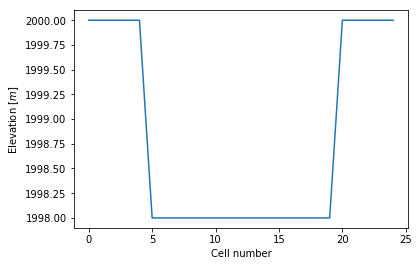

In [7]:
plt.plot(dem[:,0])
plt.xlabel('Cell number')
plt.ylabel('Elevation [$m$]')
plt.show()

### Plot of the longitudinal profile

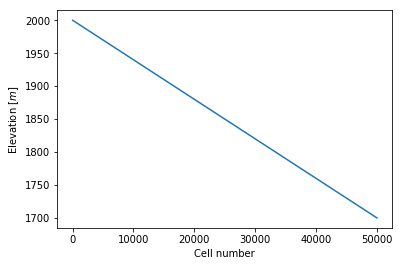

In [9]:
plt.plot(dem[0,:])
plt.xlabel('Cell number')
plt.ylabel('Elevation [$m$]')
plt.show()

### Save the DEM to .asc file
This file requires a .prj file that defines it projection. Here `xllcorner` and `yllcorner` are set for EPSG:32632 projection.
___

In [35]:
f = io.StringIO()
np.savetxt(f, dem, fmt='%.4f')
f.seek(0)
fs = f.read()
f.close()

f = open('outputDEM', 'w')
f.write("ncols " + str(Nx) + "\n")
f.write("nrows " + str(Ny) + "\n")
f.write("xllcorner " + str(616672.000000000000) + "\n")
f.write("yllcorner " + str(5119438.000000000000) + "\n")
f.write("cellsize " + str(demResolution) + "\n")
f.write("NODATA_value " + str(-9999) + "\n")
f.write(fs)
f.close()

## This a generalization of the above code to create a DEM with slope change along the longitudinal direction
___
The user can define the
- dem resolution (`demResolution` [m]),
- the slopes of the channel (`iF` [-]). The first element refers to the first stretch.
- the progressive of the stretches (`length` [m]). The first element refers to the first stretch.
- the maximum elevation of the DEM (`demMaxElevation` [m]), 
- the width of the DEM (`width` [m]),
- the width of the section (`sectionWidth` [m]),
- the height of the section (`sectionHeight` [m]).

In [10]:
demResolution = 2 
iF = [0.003,0.03,0.003]
length = [5000,10000,15000]
demMaxElevation = 2000
width = 50
sectionWidth = 30
sectionHeight = 2

In [11]:
Nx = int( length[np.size(length)-1]/demResolution )
Ny = int( width/demResolution )
dem1 = np.zeros((Ny,Nx))
ii = 0

In [12]:
for i in range(0,Nx):
    x = i*demResolution
    iF_temp = iF[ii]
    if(x>=length[ii]):
        ii= ii+1
    if(i==0):
        for j in range(Ny-1,-1,-1):
            y = (Ny-1-j)*demResolution
            if (y>=0 and y<((width-sectionWidth)/2) ):
                dem1[j,i] = demMaxElevation-iF_temp*0
            elif (y>=(width-sectionWidth)/2) and y<(((width-sectionWidth)/2)+sectionWidth ):
                dem1[j,i] = demMaxElevation-iF_temp*0 - sectionHeight
            else:
                dem1[j,i] = demMaxElevation-iF_temp*0
    else:
        for j in range(Ny-1,-1,-1):
            y = (Ny-1-j)*demResolution
            if (y>=0 and y<((width-sectionWidth)/2) ):
                dem1[j,i] = dem1[j,i-1]-iF_temp*demResolution
            elif (y>=((width-sectionWidth)/2) and y<((width-sectionWidth)/2)+sectionWidth ):
                dem1[j,i] = dem1[j,i-1]-iF_temp*demResolution#   - sectionHeight
            else:
                dem1[j,i] = dem1[j,i-1]-iF_temp*demResolution

### Plot of the uppermost section
___

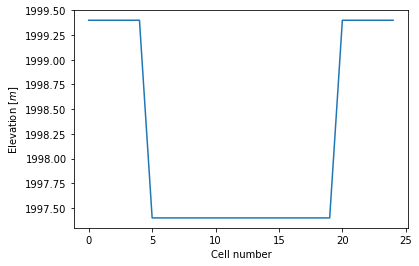

In [15]:
plt.plot(dem[:,100])
plt.xlabel('Cell number')
plt.ylabel('Elevation [$m$]')
plt.show()


### Plot of the longitudinal profile

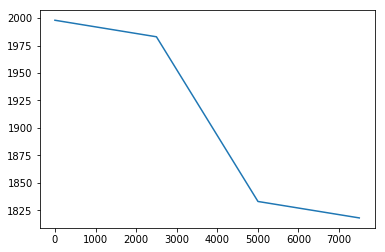

In [14]:
plt.plot(dem1[12,:])
plt.xlabel('Cell number')
plt.ylabel('Elevation [$m$]')
plt.show()

### Save the DEM to .asc file
This file requires a .prj file that defines it projection. Here `xllcorner` and `yllcorner` are set for EPSG:32632 projection.
___

In [75]:
f = io.StringIO()
np.savetxt(f, dem1, fmt='%.4f')
f.seek(0)
fs = f.read()
f.close()

f = open('ASCIIout.asc', 'w')
f.write("ncols " + str(Nx) + "\n")
f.write("nrows " + str(Ny) + "\n")
f.write("xllcorner " + str(616672.000000000000) + "\n")
f.write("yllcorner " + str(5119438.000000000000) + "\n")
f.write("cellsize " + str(demResolution) + "\n")
f.write("NODATA_value " + str(-9999) + "\n")
f.write(fs)
f.close()

 **TO DO**: generalize the above code to consider also changes in the section widht